## How to parse almost all tables that you find on the internet

In [1]:
# imports
import pandas as pd

**Documentation** https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

In [2]:
# It returns a list of all tables located at the passed URL
pd.read_html("https://en.wikipedia.org/wiki/Crime_in_Russia")

[    0                                                  1
 0 NaN  This article's lead section may be too short t...,
             Year  Total  homicides  Homicide rate  Homicide rate.1
 0       1990[13]             21145          14.29              NaN
 1       1991[13]             22621          15.24              NaN
 2       1992[13]             33912          22.83              NaN
 3       1993[13]             45060          30.35              NaN
 4       1994[13]             47870          32.26              NaN
 5       1995[13]             45257          30.50              NaN
 6       1996[13]             39083          26.38              NaN
 7       1997[13]             34995          23.66              NaN
 8       1998[13]             33553          22.72              NaN
 9       1999[13]             38225          25.97              NaN
 10      2000[13]             41090          28.03              NaN
 11      2001[13]             42921          29.40              NaN

In [3]:
# You need to find an index of the table that you are looking for
pd.read_html("https://en.wikipedia.org/wiki/Crime_in_Russia")[1].head()

,Year,Total homicides,Homicide rate,Homicide rate.1
0,1990[13],21145,14.29,NaN
1,1991[13],22621,15.24,NaN
2,1992[13],33912,22.83,NaN
3,1993[13],45060,30.35,NaN
4,1994[13],47870,32.26,NaN


In [4]:
df = pd.read_html("https://en.wikipedia.org/wiki/Crime_in_Russia")[1]

In [5]:
df.head(15)

,Year,Total homicides,Homicide rate,Homicide rate.1
0,1990[13],21145,14.29,NaN
1,1991[13],22621,15.24,NaN
2,1992[13],33912,22.83,NaN
3,1993[13],45060,30.35,NaN
4,1994[13],47870,32.26,NaN
5,1995[13],45257,30.50,NaN
6,1996[13],39083,26.38,NaN
7,1997[13],34995,23.66,NaN
8,1998[13],33553,22.72,NaN
9,1999[13],38225,25.97,NaN


#### Data Preprocessing

As you can see, the data doesn't look completely good. Some changes are required to be made.

In [6]:
df['Year'] = df['Year'].str[0:4]

In [7]:
df = df.drop(columns='Homicide rate.1')

In [8]:
df.dtypes

Year                 object
Total  homicides      int64
Homicide rate       float64
dtype: object

In [9]:
df['Year'] = df['Year'].astype(int)

In [10]:
df.dtypes

Year                  int64
Total  homicides      int64
Homicide rate       float64
dtype: object

In [11]:
df.head()

,Year,Total homicides,Homicide rate
0,1990,21145,14.29
1,1991,22621,15.24
2,1992,33912,22.83
3,1993,45060,30.35
4,1994,47870,32.26


#### Basic visualisation

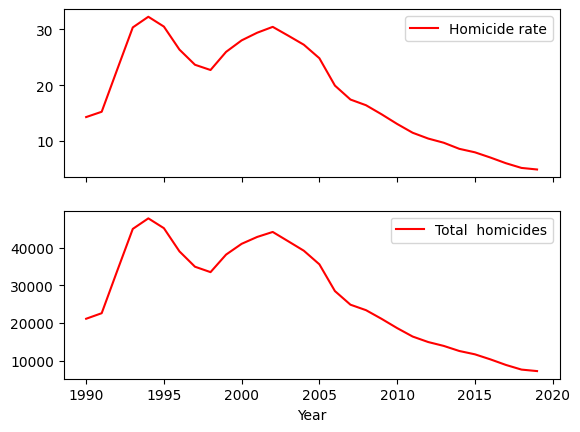

In [12]:
df.plot(x='Year', y=['Homicide rate','Total  homicides'], color='red', subplots=True);

#### Saving data into a CSV file

In [13]:
df.to_csv('crime_in_Russia.csv', index=False)